<a href="https://colab.research.google.com/github/Pimchanok6430205105/BSC_DPDM23/blob/main/Internet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Dict

link Data : https://data.go.th/dataset/dataset_25_02?fbclid=IwAR3fip4rhRVHIEnfSP00ox2DddICf_dKYy1hheuEcg5v7IfC4cFJ575Ir_c

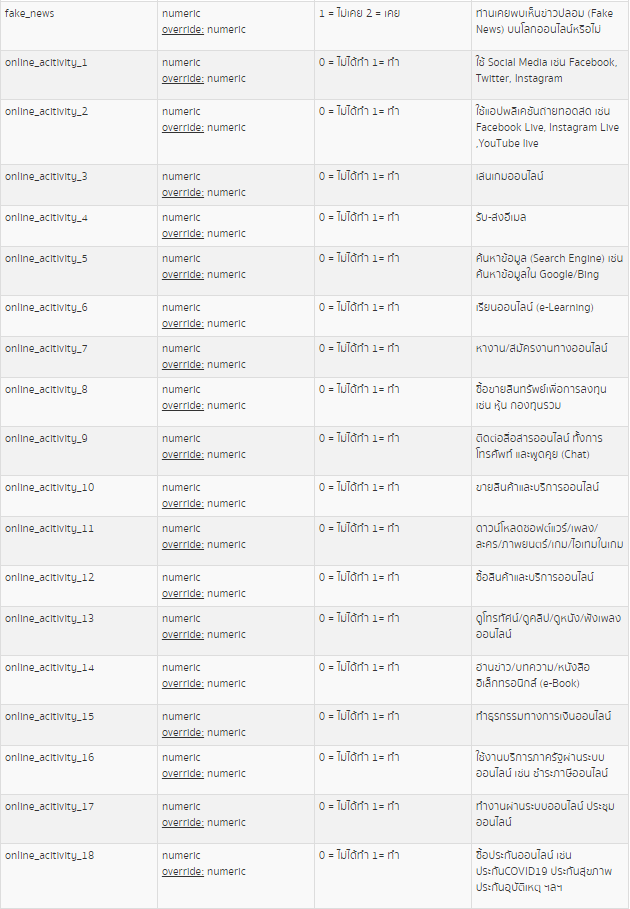

#Read Data

In [2]:
import pandas as pd

df = pd.read_excel('/content/drive/Shareddrives/Internet Behavior/raw-data-iub-2563.xlsx')

df


,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


In [3]:
count_fake_news_encounters = df[df['fake_news'] == 1].shape[0]
count_fake_news_encounters

1151

# ตรวจสอบค่า Null หรือค่าผิดปกติ ใน DataFrame

- ตรวจสอบค่าใน column fake_news ว่าเป็นค่า 1 และ  2 หรือไม่

In [4]:
# Check fake_news column
valid_fake_news = all(df['fake_news'].isin([1, 2]))
valid_fake_news

True

- ตรวจสอบค่าใน column online_acitivity ทั้งหมด ว่าเป็นค่า 0 และ  1 หรือไม่

In [5]:
# เลือกคอลัมน์ที่ 2 ถึงคอลัมน์สุดท้าย
activity_columns = df.iloc[:, 1:]

# ตรวจสอบว่าค่าทั้งหมดเป็น 0 หรือ 1
valid_values = (activity_columns.isin([0, 1])).all().all()

valid_values


False

- ตรวจสอบค่าที่ไม่ใช่ตัวเลขในข้อมูล

In [6]:
non_numeric_values = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    1
dtype: int64


- แสดง row ที่มีข้อมูลที่ไม่ใช่ตัวเลข

In [7]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
non_numeric_rows_df = df[non_numeric_rows]
non_numeric_rows_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
56,2,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,S


- ลบ row ไม่ใช่ตัวเลข (เนื่องจากมีข้อมูลที่ผิดปกติไม่เกิน 5% ของข้อมูลทั้งหมด)

In [8]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
numeric_df = df[~non_numeric_rows]
numeric_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


- ตรวจสอบค่าผิดปกติอีกครั้ง

In [9]:
non_numeric_values = numeric_df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


- หาค่า missing value จากข้อมูลทั้งหมด

In [10]:
null_values = numeric_df.isnull().sum()

print(null_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


# กำหนด Features และ Target varible (X,y)

In [11]:
data = numeric_df.copy()

In [12]:
# Features (X)
X = data.drop(columns=['fake_news'])  # คอลัมน์กิจกรรมออนไลน์ทั้งหมด

# Target variable (y)
y = data['fake_news']  # เลือกคอลัมน์ 'fake_news' เป็นตัวแปรเป้าหมาย


# Cross Vallidatoin

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

# กำหนดจำนวน K ใน K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# ประเมินโมเดลโดยใช้ Cross Validation
scores = cross_val_score(tree, X, y, cv=k_fold)

# แสดงค่าความแม่นยำของโมเดลจากทุก Fold
print('Cross Validation scores:', scores)

# คำนวณค่าเฉลี่ยของความแม่นยำจากทุก Fold
print('Average Cross Validation score:', scores.mean())



Cross Validation scores: [0.92009238 0.91616628 0.92332564 0.92192192 0.91707092]
Average Cross Validation score: 0.9197154269209695


# จัดการ Imbalance data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Method 1: Undersampling & Oversampling

- ปรับ train test เป็น 80% 20%

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# แบ่งข้อมูลออกเป็นชุด
X_train_OU, X_test_OU, y_train_OU, y_test_OU = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from collections import Counter

# นับค่าที่ปรากฏซ้ำกันใน y_train_OU
count_y_train_OU = Counter(y_train_OU)

# นับค่าที่ปรากฏซ้ำกันใน y_test_OU
count_y_test_OU = Counter(y_test_OU)


print("Count of values in y_train_OU:")
print(count_y_train_OU)
print()

print("Count of values in y_test_OU:")
print(count_y_test_OU)
print()


Count of values in y_train_OU:
Counter({2: 16400, 1: 918})

Count of values in y_test_OU:
Counter({2: 4097, 1: 233})



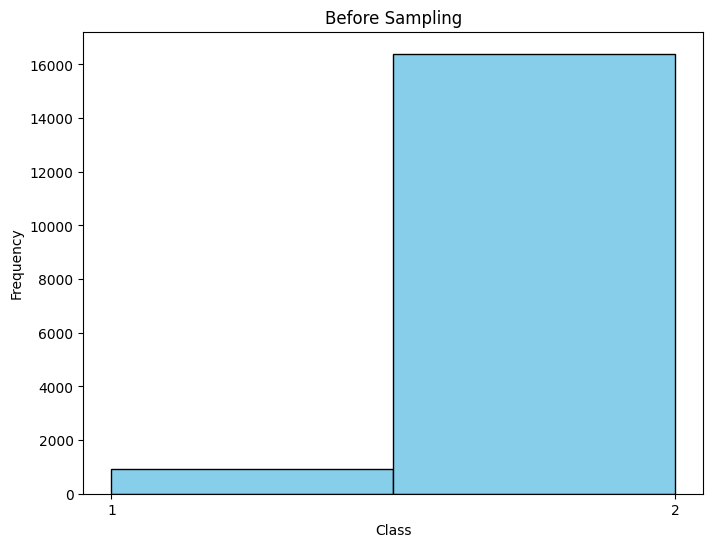

In [17]:
import matplotlib.pyplot as plt

# แสดง Histogram ของ y_train_OU ก่อนการทำ Over and Under Sampling
plt.figure(figsize=(8, 6))
plt.hist(y_train_OU, bins=2, color='skyblue', edgecolor='black')
plt.title('Before Sampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([1, 2])  # กำหนดแกน x เป็นคลาส 1 และ 2
plt.show()


### Oversampling



In [18]:
# Oversampling
oversampler = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversampler.fit_resample(X_train_OU, y_train_OU) #fit_resample ช่วยสร้างข้อมูลใหม่ในคลาส ที่มีข้อมูลน้อยกว่า และทำให้จำนวนข้อมูลในแต่ละคลาสเท่ากันหรือใกล้เคียงกัน

In [19]:
count_y_train_over = Counter(y_train_over)

print(count_y_train_over)
print()

Counter({2: 16400, 1: 16400})



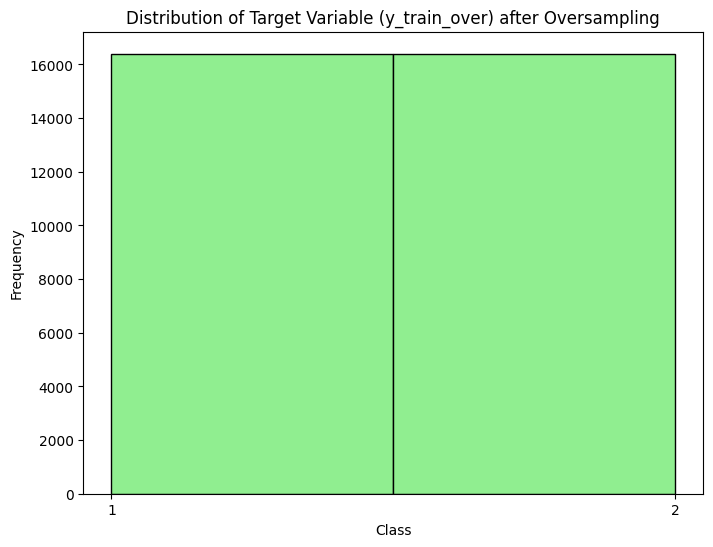

In [20]:
import matplotlib.pyplot as plt

# แสดง Histogram ของ y_train_over หลัง Oversampling
plt.figure(figsize=(8, 6))
plt.hist(y_train_over, bins=2, color='lightgreen', edgecolor='black')
plt.title('Distribution of Target Variable (y_train_over) after Oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([1, 2])  # กำหนดแกน x เป็นคลาส 1 และ 2
plt.show()


#### Train Model

In [21]:
# ฝึกโมเดล Decision Tree
tree_over = DecisionTreeClassifier(random_state=0)
tree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=0)

#### Cross Vallidatoin

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# กำหนดจำนวน K ใน K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# ประเมินโมเดลโดยใช้ Cross Validation
scores = cross_val_score(tree_over, X_test_OU, y_test_OU, cv=k_fold)

# แสดงค่าความแม่นยำของโมเดลจากทุก Fold
print('Cross Validation scores:', scores)

# คำนวณค่าเฉลี่ยของความแม่นยำจากทุก Fold
print('Average Cross Validation score:', scores.mean())



Cross Validation scores: [0.89491917 0.89722864 0.89722864 0.88452656 0.88683603]
Average Cross Validation score: 0.8921478060046188


#### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
# ทำนายบนชุดข้อมูลทดสอบ
y_pred = tree_over.predict(X_test_OU)

In [25]:
cm = confusion_matrix(y_test_OU, y_pred)

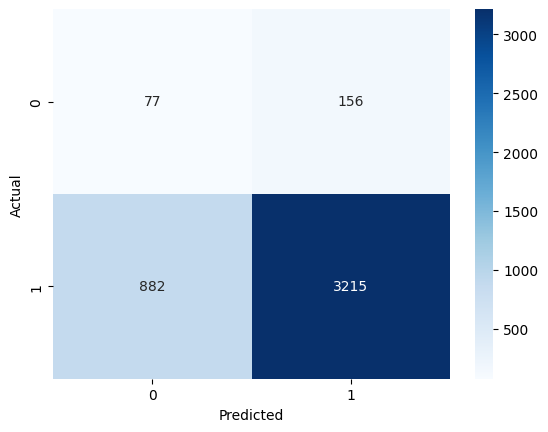

In [26]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Eva

In [27]:
# วัดประสิทธิภาพของโมเดล
accuracy = accuracy_score(y_test_OU, y_pred)
precision = precision_score(y_test_OU, y_pred, average='binary')  # binary average สำหรับประสิทธิภาพของคลาสเดียว
recall = recall_score(y_test_OU, y_pred, average='binary')
f1 = f1_score(y_test_OU, y_pred, average='binary')

# แสดงค่าประสิทธิภาพของโมเดล
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7602771362586606
Precision: 0.08029197080291971
Recall: 0.33047210300429186
F1 Score: 0.12919463087248323


### Undersamplig

- การทำ Undersampling อาจช่วยให้ปรับปรุงประสิทธิภาพของโมเดลโดยลดปัญหาการที่โมเดลมีแนวโน้มที่จะเรียนรู้ความสัมพันธ์ที่ไม่ถูกต้องจากคลาสที่มีจำนวนมากกว่าคลาสที่มีจำนวนน้อย เป็นต้น อย่างไรก็ตาม การทำ Undersampling อาจทำให้สูญเสียข้อมูลที่มีความสำคัญหรือข้อมูลที่มีความหลากหลายน้อยลงไป และยังมีความเสี่ยงที่จะทำให้โมเดลไม่สามารถจำแนกคลาสที่มีความน่าสนใจได้อย่างเพียงพอ

In [28]:
# Undersampling
undersampler = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = undersampler.fit_resample(X_train_OU, y_train_OU) # ทำการสุ่มตัวอย่างในคลาสที่มีจำนวนมาก ให้มีจำนวนเท่ากับคลาสที่มีจำนวนน้อย

In [29]:
count_y_train_under = Counter(y_train_under)

print(count_y_train_under)
print()

Counter({1: 918, 2: 918})



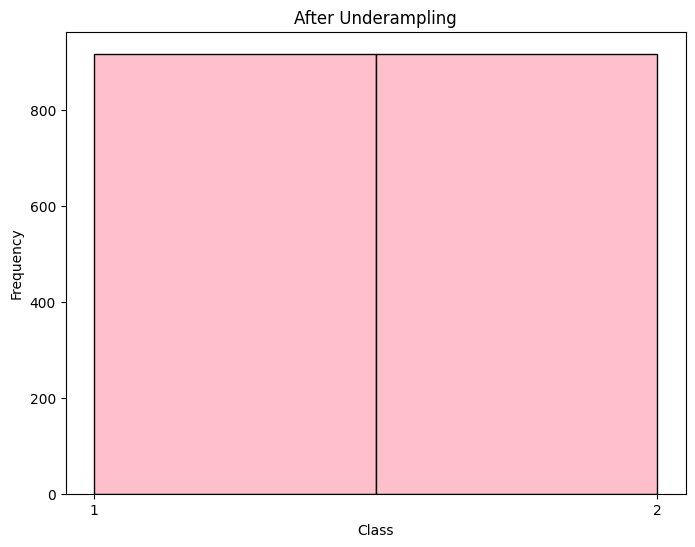

In [30]:
# แสดงกราฟ
import matplotlib.pyplot as plt

# แสดง Histogram ของ y_train_over หลัง Oversampling
plt.figure(figsize=(8, 6))
plt.hist(y_train_under, bins=2, color='pink', edgecolor='black')
plt.title('After Underampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([1, 2])  # กำหนดแกน x เป็นคลาส 1 และ 2
plt.show()

#### Train Model

In [31]:
# ฝึกโมเดล Decision Tree
tree_under = DecisionTreeClassifier(random_state=0)
tree_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier(random_state=0)

#### Cross Vallidatoin

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# กำหนดจำนวน K ใน K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# ประเมินโมเดลโดยใช้ Cross Validation
scores = cross_val_score(tree_under, X_test_OU, y_test_OU, cv=k_fold)

# แสดงค่าความแม่นยำของโมเดลจากทุก Fold
print('Cross Validation scores:', scores)

# คำนวณค่าเฉลี่ยของความแม่นยำจากทุก Fold
print('Average Cross Validation score:', scores.mean())



Cross Validation scores: [0.89491917 0.89722864 0.89722864 0.88452656 0.88683603]
Average Cross Validation score: 0.8921478060046188


#### Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
# ทำนายบนชุดข้อมูลทดสอบ
y_pred = tree_under.predict(X_test_OU)

In [35]:
cm = confusion_matrix(y_test_OU, y_pred)

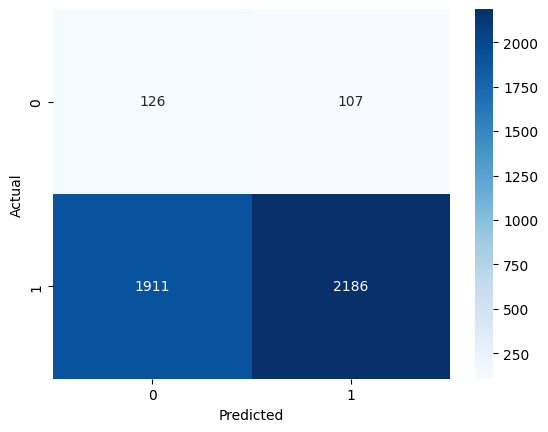

In [36]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Eva

In [37]:
# วัดประสิทธิภาพของโมเดล
accuracy = accuracy_score(y_test_OU, y_pred)
precision = precision_score(y_test_OU, y_pred, average='binary')  # binary average สำหรับประสิทธิภาพของคลาสเดียว
recall = recall_score(y_test_OU, y_pred, average='binary')
f1 = f1_score(y_test_OU, y_pred, average='binary')

# แสดงค่าประสิทธิภาพของโมเดล
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5339491916859123
Precision: 0.061855670103092786
Recall: 0.5407725321888412
F1 Score: 0.11101321585903083


## Method 2: Cost-sensitive Learning

### 2.1 class_weights = {0: 10, 1: 1}  

In [38]:
# แบ่งข้อมูลออกเป็นชุด
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X, y, test_size=0.2, random_state=0)



#### replace
- แทนที่ '2' ด้วย '1' และ '1' ด้วย '0' ในคลาส เพราะ Cost-sensitive Learning ต้องใช้ตัวเลขที่เป็นไบนารีเท่านั้น หรือ 0 , 1

In [39]:
y_train_binary = y_train_cost.replace({2: 1, 1: 0})
y_test_binary = y_test_cost.replace({2: 1, 1: 0})

#### weight
- ปรับน้ำหนัก โมเดลจะให้ความสำคัญกับคลาสที่มีค่าเป็น 1 มากกว่าคลาสที่มีค่าเป็น 0
- คลาสที่มีค่าเป็น 0 จะมีค่าน้ำหนักเท่ากับ 1 คลาสที่มีค่าเป็น 1 จะมีค่าน้ำหนักเท่ากับ 10

In [40]:
class_weights = {0: 10, 1: 1}

#### Train Model

In [41]:
# Train  model
tree_cost = DecisionTreeClassifier(random_state=0, class_weight=class_weights)
tree_cost.fit(X_train_cost, y_train_binary)


DecisionTreeClassifier(class_weight={0: 10, 1: 1}, random_state=0)

#### Cross Vallidatoin

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# กำหนดจำนวน K ใน K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# ประเมินโมเดลโดยใช้ Cross Validation
scores = cross_val_score(tree_cost, X_test_cost, y_test_binary, cv=k_fold)

# แสดงค่าความแม่นยำของโมเดลจากทุก Fold
print('Cross Validation scores:', scores)

# คำนวณค่าเฉลี่ยของความแม่นยำจากทุก Fold
print('Average Cross Validation score:', scores.mean())



Cross Validation scores: [0.83256351 0.83949192 0.84872979 0.85103926 0.82332564]
Average Cross Validation score: 0.8390300230946883


#### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
# ทำนายบนชุดข้อมูลทดสอบ
y_pred = tree_cost.predict(X_test_cost)

In [45]:
cm = confusion_matrix(y_test_binary, y_pred)

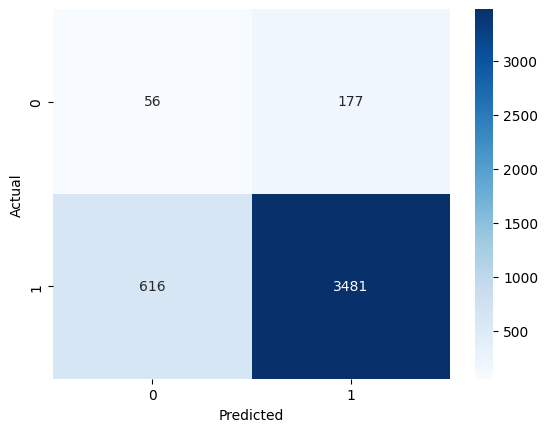

In [46]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Eva

In [47]:

# ประเมิน model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# แสดงค่าประสิทธิภาพของโมเดล
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:, {precision:.4f}")
print(f"Recall:, {recall:.4f}")
print(f"F1 Score:, {f1:.4f}")


Accuracy: 0.8169
Precision:, 0.9516
Recall:, 0.8496
F1 Score:, 0.8977


### 2.2 class_weight='balanced'

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# แบ่งชุดข้อมูลเป็นชุดtrainและชุดtest
X_train_cw, X_test_cw, y_train_cw, y_test_cw = train_test_split(X, y, test_size=0.2, random_state=0)


In [49]:
from collections import Counter

# นับค่าที่ปรากฏซ้ำกันใน y_train_cw
count_y_train_cw = Counter(y_train_cw)

# นับค่าที่ปรากฏซ้ำกันใน y_test_cw
count_y_test_cw = Counter(y_test_cw)


print("Count of values in y_train_cw:")
print(count_y_train_cw)
print()

print("Count of values in y_test_cw:")
print(count_y_test_cw)
print()


Count of values in y_train_cw:
Counter({2: 16400, 1: 918})

Count of values in y_test_cw:
Counter({2: 4097, 1: 233})



#### Train

In [50]:
# สร้างโมเดล Decision Tree โดยใช้การปรับน้ำหนักของคลาส
tree_cw = DecisionTreeClassifier(random_state=0, class_weight='balanced')

# ฝึกโมเดลด้วยชุดข้อมูลtrain
tree_cw.fit(X_train_cw, y_train_cw)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

#### Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification


# สร้าง KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# คำนวณคะแนน cross-validation
cv_scores = cross_val_score(tree_cw, X_test_cw,y_test_cw, cv=kf)

print(f'Cross-validation scores: {cv_scores}')

print(f'Mean score: {cv_scores.mean()}')


Cross-validation scores: [0.81293303 0.83025404 0.82909931 0.83487298 0.82678984]
Mean score: 0.8267898383371823


#### Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
# ทำนายบนชุดข้อมูลทดสอบ
y_pred = tree_cw.predict(X_test_cw)

In [54]:
cm = confusion_matrix(y_test_cw, y_pred)

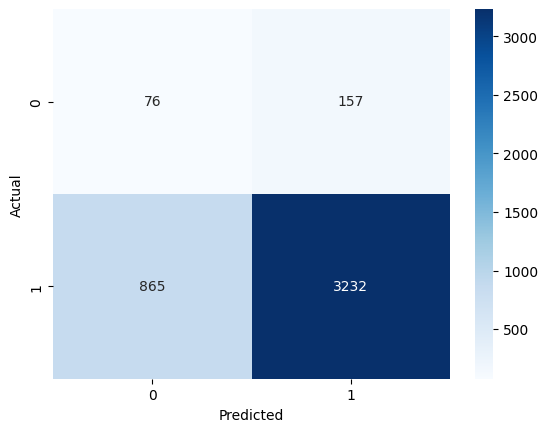

In [55]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Eva

In [56]:
# คำนวณและพิมพ์ความแม่นยำของโมเดล
accuracy = accuracy_score(y_test_cw, y_pred)
precision = precision_score(y_test_cw, y_pred)
recall = recall_score(y_test_cw, y_pred)
f1 = f1_score(y_test_cw, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:, {precision:.4f}")
print(f"Recall:, {recall:.4f}")
print(f"F1 Score:, {f1:.4f}")

Accuracy: 0.7640
Precision:, 0.0808
Recall:, 0.3262
F1 Score:, 0.1295


## Method 3: Ensemble learning

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 1. แบ่งชุดข้อมูล
X_train_ssg, X_test_ssg, y_train_ssg, y_test_ssg = train_test_split(X, y, test_size=0.2, random_state=0)


In [58]:
from collections import Counter

# นับค่าที่ปรากฏซ้ำกันใน y_train_ssg
count_y_train_ssg = Counter(y_train_ssg)

# นับค่าที่ปรากฏซ้ำกันใน y_test_ssg
count_y_test_ssg = Counter(y_test_ssg)


print("Count of values in y_train_ssg:")
print(count_y_train_ssg)
print()

print("Count of values in y_test_ssg:")
print(count_y_test_ssg)
print()


Count of values in y_train_ssg:
Counter({2: 16400, 1: 918})

Count of values in y_test_ssg:
Counter({2: 4097, 1: 233})



### Ensemble learning

In [59]:
# 2. ใช้ SMOTE เพื่อจัดการกับข้อมูลไม่สมดุล
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_ssg, y_train_ssg)


In [60]:
from collections import Counter

y_train_smote_counts = Counter(y_train_smote)

print(y_train_smote_counts)


Counter({2: 16400, 1: 16400})


In [61]:
# 3. สร้างและฝึกโมเดล
tree_smote = DecisionTreeClassifier(random_state=0)
tree_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=0)

### Cross Validation

In [62]:
# กำหนดจำนวน K ใน K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# ประเมินโมเดลโดยใช้ Cross Validation
scores = cross_val_score(tree_smote, X_test_ssg, y_test_ssg, cv=k_fold)

# แสดงค่าความแม่นยำของโมเดลจากทุก Fold
print('Cross Validation scores:', scores)

# คำนวณค่าเฉลี่ยของความแม่นยำจากทุก Fold
print('Average Cross Validation score:', scores.mean())


Cross Validation scores: [0.89491917 0.89722864 0.89722864 0.88452656 0.88683603]
Average Cross Validation score: 0.8921478060046188


### Confusion Matrix

In [63]:
# ทำนายบนชุดข้อมูลทดสอบ
y_pred = tree_smote.predict(X_test_ssg)

In [64]:
cm = confusion_matrix(y_test_ssg, y_pred)

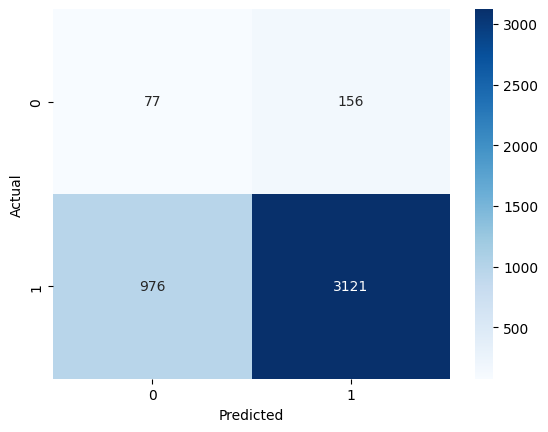

In [65]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Eva

In [66]:
# วัดประสิทธิภาพของโมเดล
accuracy = accuracy_score(y_test_ssg, y_pred)
precision = precision_score(y_test_ssg, y_pred, average='binary')  # binary average สำหรับประสิทธิภาพของคลาสเดียว
recall = recall_score(y_test_ssg, y_pred, average='binary')
f1 = f1_score(y_test_ssg, y_pred, average='binary')

# แสดงค่าประสิทธิภาพของโมเดล
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7385681293302541
Precision: 0.0731244064577398
Recall: 0.33047210300429186
F1 Score: 0.11975116640746503


# หาค่าพารามิเตอร์ที่เหมาะสมสำหรับ Decition tree


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# ตั้งค่าพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# สร้างโมเดล Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# สร้าง GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# ฝึกโมเดลด้วย GridSearchCV
grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", grid_search.best_params_)

NameError: name 'X_train' is not defined

#สร้าง Decision tree

In [ ]:
# แทนที่ '2' ด้วย '1' และ '1' ด้วย '0' ในคลาส เพราะ Cost-sensitive Learning ต้องใช้ตัวเลขที่เป็นไบนารีเท่านั้น หรือ 0 , 1
y_train_binary = y_train_cost.replace({2: 1, 1: 0})
y_test_binary = y_test_cost.replace({2: 1, 1: 0})

# ปรับน้ำหนัก โมเดลจะให้ความสำคัญกับคลาสที่มีค่าเป็น 1 มากกว่าคลาสที่มีค่าเป็น 0
class_weights = {0: 1, 1: 10}  # คลาสที่มีค่าเป็น 0 จะมีค่าน้ำหนักเท่ากับ 1 คลาสที่มีค่าเป็น 1 จะมีค่าน้ำหนักเท่ากับ 10

# Train  model
tree = DecisionTreeClassifier(random_state=0, class_weight=class_weights,max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)
tree.fit(X_train_cost, y_train_binary)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# สร้างรูปภาพของต้นไม้
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train_cost.columns, class_names=['0', '1'], proportion=True, rounded=True)
plt.show()


In [ ]:
# Predict test set
y_pred = tree.predict(X_test_cost)
# ประเมิน model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# แสดงค่าประสิทธิภาพของโมเดล
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:, {precision:.4f}")
print(f"Recall:, {recall:.4f}")
print(f"F1 Score:, {f1:.4f}")

# Oversampling + Cost-sensitive + class weight




### Train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# แบ่งข้อมูลออกเป็นชุด
X_train_OU, X_test_OU, y_train_OU, y_test_OU = train_test_split(X, y, test_size=0.2, random_state=0)

# ใช้ Oversampling
oversampler = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversampler.fit_resample(X_train_OU, y_train_OU)


# Predict on the test set
y_pred = tree.predict(X_test_OU)  # Use the original test set for prediction

# Replace class labels '2' with '1' and '1' with '0' for cost-sensitive learning
y_train_binary = y_train_over.replace({2: 1, 1: 0})
y_test_binary = y_test_OU.replace({2: 1, 1: 0})  # Use the original test set for evaluation

# Define class weights for cost-sensitive learning
class_weights = {0: 1, 1: 10}  # Higher weight for minority class

# Train decision tree model with cost-sensitive learning
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced' ,max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)
tree.fit(X_train_over, y_train_binary)  # Use oversampled data for training

# Predict on the test set
y_pred = tree.predict(X_test_OU)

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# Display performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# สร้างรูปภาพของต้นไม้
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train_cost.columns, class_names=['0', '1'], proportion=True, rounded=True)
plt.show()

#TESTTT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# แบ่งข้อมูลออกเป็นชุด
X_train_OCC, X_test_OCC, y_train_OCC, y_test_OCC = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from collections import Counter

# นับค่าที่ปรากฏซ้ำกันใน y_train_OU
count_y_train_OCC = Counter(y_train_OCC)

# นับค่าที่ปรากฏซ้ำกันใน y_test_OU
count_y_test_OCC = Counter(y_test_OCC)


print("Count of values in y_train_OCC:")
print(count_y_train_OCC)
print()

print("Count of values in y_test_OCC:")
print(count_y_test_OCC)
print()


##ใช้ Oversampling

In [ ]:
# ใช้ Oversampling
oversampler = RandomOverSampler(random_state=0)
X_train_o, y_train_o = oversampler.fit_resample(X_train_OCC, y_train_OCC)


In [ ]:
count_y_train_o = Counter(y_train_o)

print(count_y_train_o)
print()



## Replace

In [ ]:
# Replace class labels '2' with '1' and '1' with '0' for cost-sensitive learning
y_train_binary = y_train_o.replace({2: 1, 1: 0})
y_test_binary = y_test_OU.replace({2: 1, 1: 0})  # Use the original test set for evaluation


## ใช้ Cost-sensitive Learning

In [ ]:
# Define class weights for cost-sensitive learning
class_weights = {0: 1, 1: 10}  # Higher weight for minority class

In [ ]:
# Train decision tree model with cost-sensitive learning
tree = DecisionTreeClassifier(random_state=0 ,max_depth= 3, min_samples_leaf= 1, min_samples_split= 2) #, class_weight='balanced' ,max_depth= 3, min_samples_leaf= 1, min_samples_split= 2
tree.fit(X_train_o, y_train_binary)  # Use oversampled data for training

#### Cross Vallidatoin

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# กำหนดจำนวน K ใน K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# ประเมินโมเดลโดยใช้ Cross Validation
scores = cross_val_score(tree, X_test_OCC, y_test_OCC, cv=k_fold)

# แสดงค่าความแม่นยำของโมเดลจากทุก Fold
print('Cross Validation scores:', scores)

# คำนวณค่าเฉลี่ยของความแม่นยำจากทุก Fold
print('Average Cross Validation score:', scores.mean())



#### Confusion Matrix

In [ ]:
# Predict on the test set
y_pred = tree.predict(X_test_OCC)

In [ ]:
cm = confusion_matrix(y_test_binary, y_pred)

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# Display performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# สร้างรูปภาพของต้นไม้
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train_cost.columns, class_names=['0', '1'], proportion=True, rounded=True)
plt.show()